<a href="https://colab.research.google.com/github/rahmani3101/Machine-Learning-/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Step 1: Manually Load Dataset

In [ ]:
students = ['A','B','C','D','E','F','G','H','I','J']
data = np.array([
    [78, 85, 82, 90],
    [45, 52, 48, 65],
    [88, 94, 90, 96],
    [70, 72, 68, 80],
    [60, 65, 62, 70],
    [92, 89, 95, 98],
    [55, 60, 58, 68],
    [85, 87, 88, 92],
    [50, 54, 52, 66],
    [76, 80, 78, 88]
])

In [ ]:
features = ['Math', 'Science', 'English', 'Attendance']

In [ ]:
features = ['Math', 'Science', 'English', 'Attendance']
correlation_matrix = np.corrcoef(data.T)

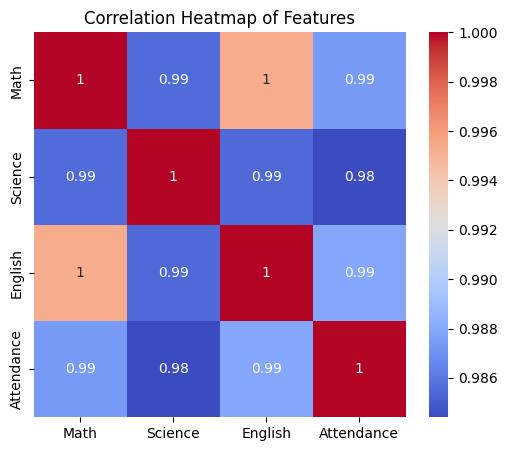

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, xticklabels=features, yticklabels=features, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

 Step 3: Standardize the Features

In [ ]:
mean = np.mean(data, axis=0)
std_dev = np.std(data, axis=0)
data_std = (data - mean) / std_dev

Step 4: Apply PCA (Manually using Numpy)

Step 4.1: Covariance Matrix

In [ ]:
cov_matrix = np.cov(data_std.T)

Step 4.2: Eigen decomposition

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

Step 4.3: Sort eigenvectors by decreasing eigenvalues

In [ ]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

 Step 5: Explained Variance Ratio

In [ ]:
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.99076139 0.00444148 0.00363648 0.00116065]


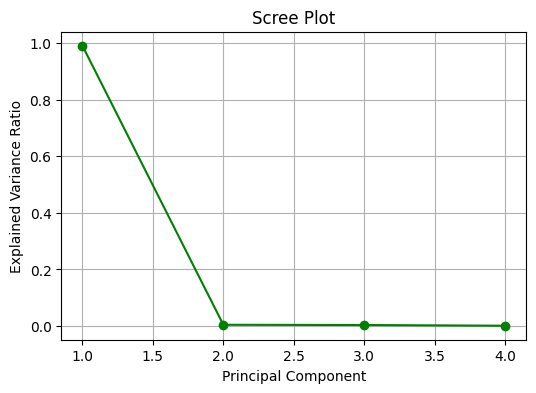

In [ ]:
# Scree Plot
plt.figure(figsize=(6, 4))
plt.plot(np.arange(1, 5), explained_variance_ratio, 'o-', color='green')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()



Step 6: Project Data onto First 2 Principal Components

In [ ]:
W = eigenvectors[:, :2]  # Take first 2 eigen vectors
data_pca = data_std.dot(W)

2D Scatter Plot


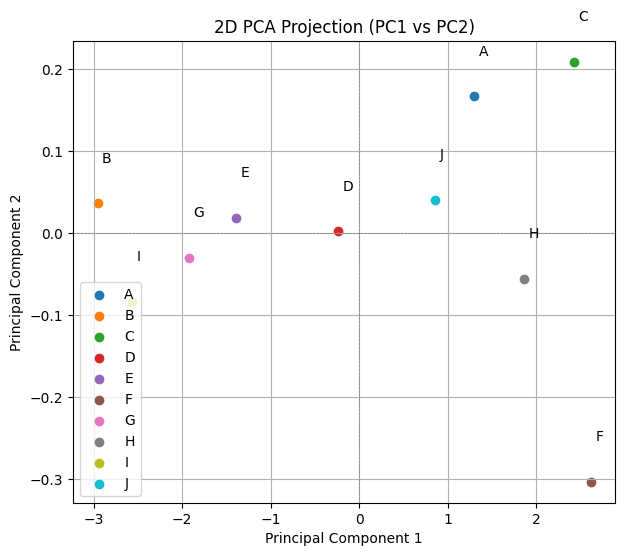

In [ ]:
plt.figure(figsize=(7, 6))
for i in range(len(data_pca)):
    plt.scatter(data_pca[i, 0], data_pca[i, 1], label=students[i])
    plt.text(data_pca[i, 0] + 0.05, data_pca[i, 1] + 0.05, students[i])

plt.title('2D PCA Projection (PC1 vs PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()



 Step 7: Reconstruct Data from Principal Components


 Reverse projection: data_std ≈ data_pca × W.T


In [ ]:
data_std_reconstructed = data_pca.dot(W.T)
data_reconstructed = data_std_reconstructed * std_dev + mean

Step 8: Compare Original and Reconstructed Data

In [ ]:
print("\nOriginal vs Reconstructed Data (rounded):")
print("{:<3} {:>35} {:>35}".format("ID", "Original", "Reconstructed"))
for i in range(len(data)):
    original = np.round(data[i], 2)
    recon = np.round(data_reconstructed[i], 2)
    print(f"{students[i]:<3} {str(original):>35} {str(recon):>35}")


Original vs Reconstructed Data (rounded):
ID                             Original                       Reconstructed
A                         [78 85 82 90]           [79.12 85.24 81.4  89.38]
B                         [45 52 48 65]           [46.36 52.79 48.32 63.01]
C                         [88 94 90 96]           [87.68 93.87 90.05 96.32]
D                         [70 72 68 80]           [67.99 72.08 70.17 79.81]
E                         [60 65 62 70]           [58.82 63.93 60.9  72.7 ]
F                         [92 89 95 98]           [92.49 89.2  94.94 97.49]
G                         [55 60 58 68]           [54.9  59.46 56.95 69.37]
H                         [85 87 88 92]           [84.97 86.67 87.32 92.84]
I                         [50 54 52 66]           [50.23 54.22 52.24 65.44]
J                         [76 80 78 88]           [76.44 80.54 78.71 86.64]


Interpretation

In [ ]:
total_explained = np.sum(explained_variance_ratio[:2]) * 100
print(f"\nTotal Variance Captured by First 2 Principal Components: {total_explained:.2f}%")


Total Variance Captured by First 2 Principal Components: 99.52%
